In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import mcu
import cylinder_dataset_generator as cyl
import dataset_generator


In [ ]:
figure_num = 200
figure_point_cnt = 300
deterministic_param_scatter = False
p = 3
sorted = True
deterministic_scatter = True
lw = np.array([1, 1, 0])
up = np.array([1, 10, 45])
param_names = np.array(["height", "radius", "angle_x"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, cyl.generate_cylinder_points, noise_level=0,
                                                      min_num_points=figure_point_cnt)
k = 6
c = 12000
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, figures, k)

q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges, c)

0.801025547682847


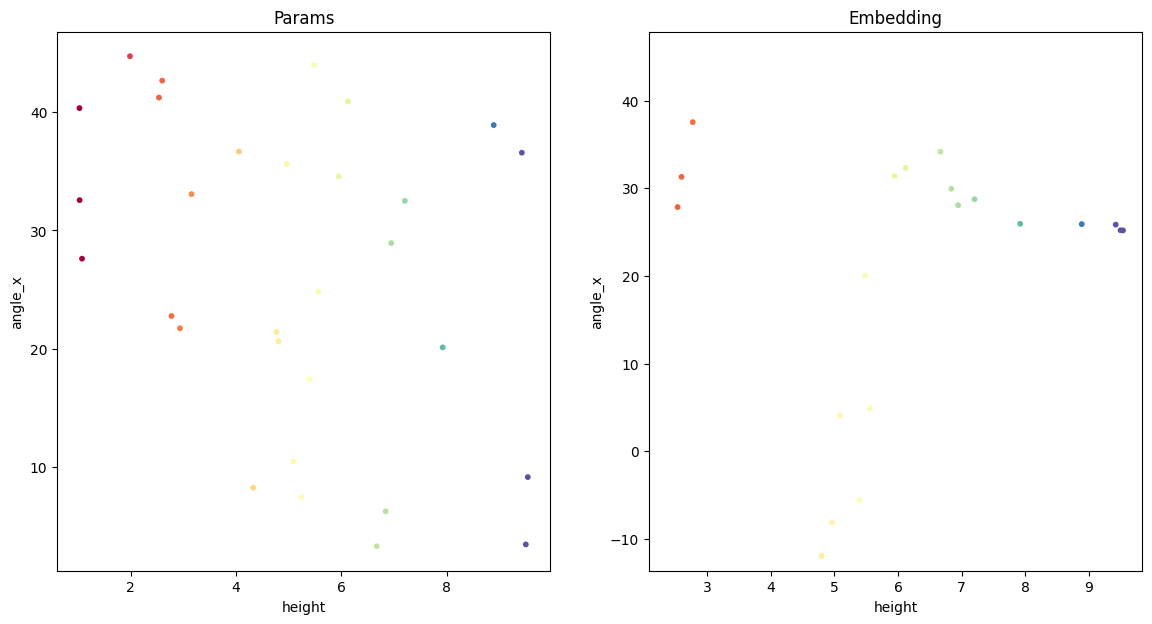

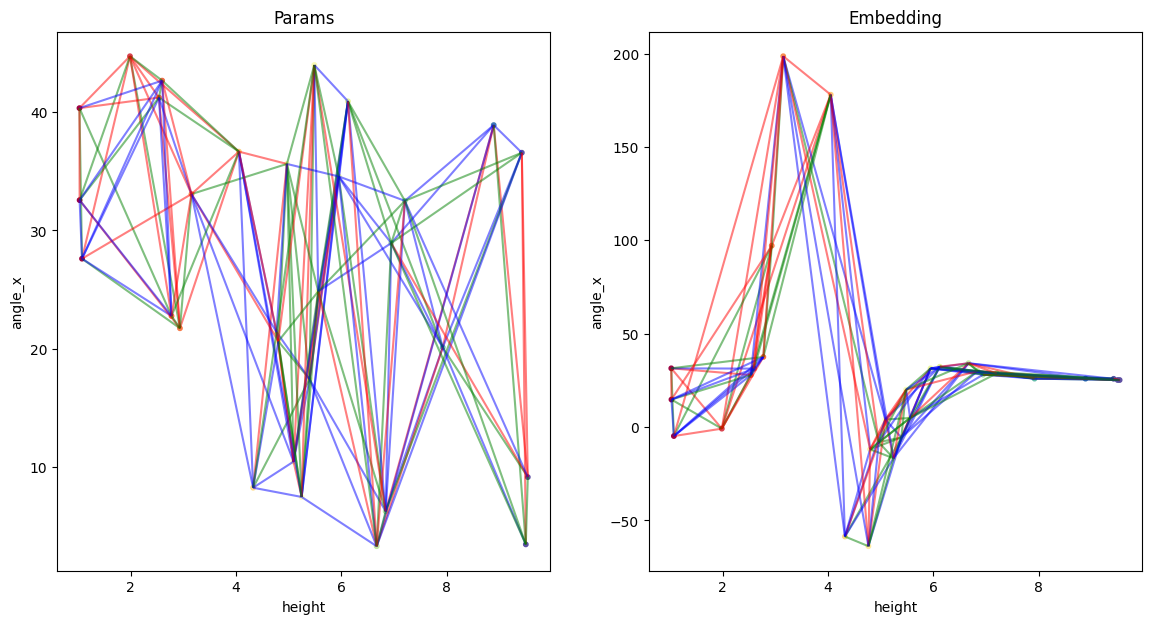

In [8]:
ld_embedding = mcu.reduce_dimensions(q, p)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

ld_embedding_to_params = np.dot(ld_embedding, np.linalg.inv(regression_matrix)) * x_stds + x_means

rre = mcu.compute_rre(ld_embedding_to_params, control_vars)
print(np.median(rre))
mcu.plot_embeddings_vs_parameters(embedding=ld_embedding_to_params, params=control_vars, param_names=param_names)
mcu.plot_embeddings_vs_parameters(embedding=ld_embedding_to_params, params=control_vars, param_names=param_names,
                                  edges=edges)

In [75]:
pieces_cnt = 5
test_data_size = 20
noise_level = 0.1
interval_runs, intervals = mcu.test_predictive_optimization(lw, up, p, k, cyl.generate_cylinder_points,
                                                            figure_point_cnt,
                                                            centered_y, ld_embedding, regression_matrix, y_means,
                                                            y_scaler,
                                                            x_stds, x_means, noise_level, pieces_cnt, test_data_size,
                                                            same_value=False)

-----------
x_opt  = [ 2.3441003   1.91493646 39.09352153], x_err = 1060.0807426993151
x_real = [1.04497978 1.1500215  5.11098563]
-----------
x_opt  = [2.78918471 1.52192576 6.01860054], x_err = 1076.5869075412265
x_real = [1.16969882 1.05283107 0.96076985]
-----------
x_opt  = [2.80744439 1.52192576 6.01860054], x_err = 430.19952592185814
x_real = [2.08551852 1.09371257 6.1336501 ]
-----------
x_opt  = [ 2.3441003   1.78378089 39.09352153], x_err = 738.3563958717452
x_real = [1.63271945 1.10996718 6.87453014]
-----------
x_opt  = [2.95719184 1.52192576 6.01860054], x_err = 178.2734300984507
x_real = [2.53676634 1.14300431 7.47364921]
-----------
x_opt  = [3.04649604 1.52192576 6.01860054], x_err = 273.0983644873323
x_real = [2.40222649 1.06620318 0.9347702 ]
-----------
x_opt  = [ 2.44210262  1.75875388 39.09352153], x_err = 14.066149206815137
x_real = [2.53237539 1.61697937 1.14585339]
-----------
x_opt  = [ 2.3441003   1.84404316 39.09352153], x_err = 197.46775262425268
x_real = [1

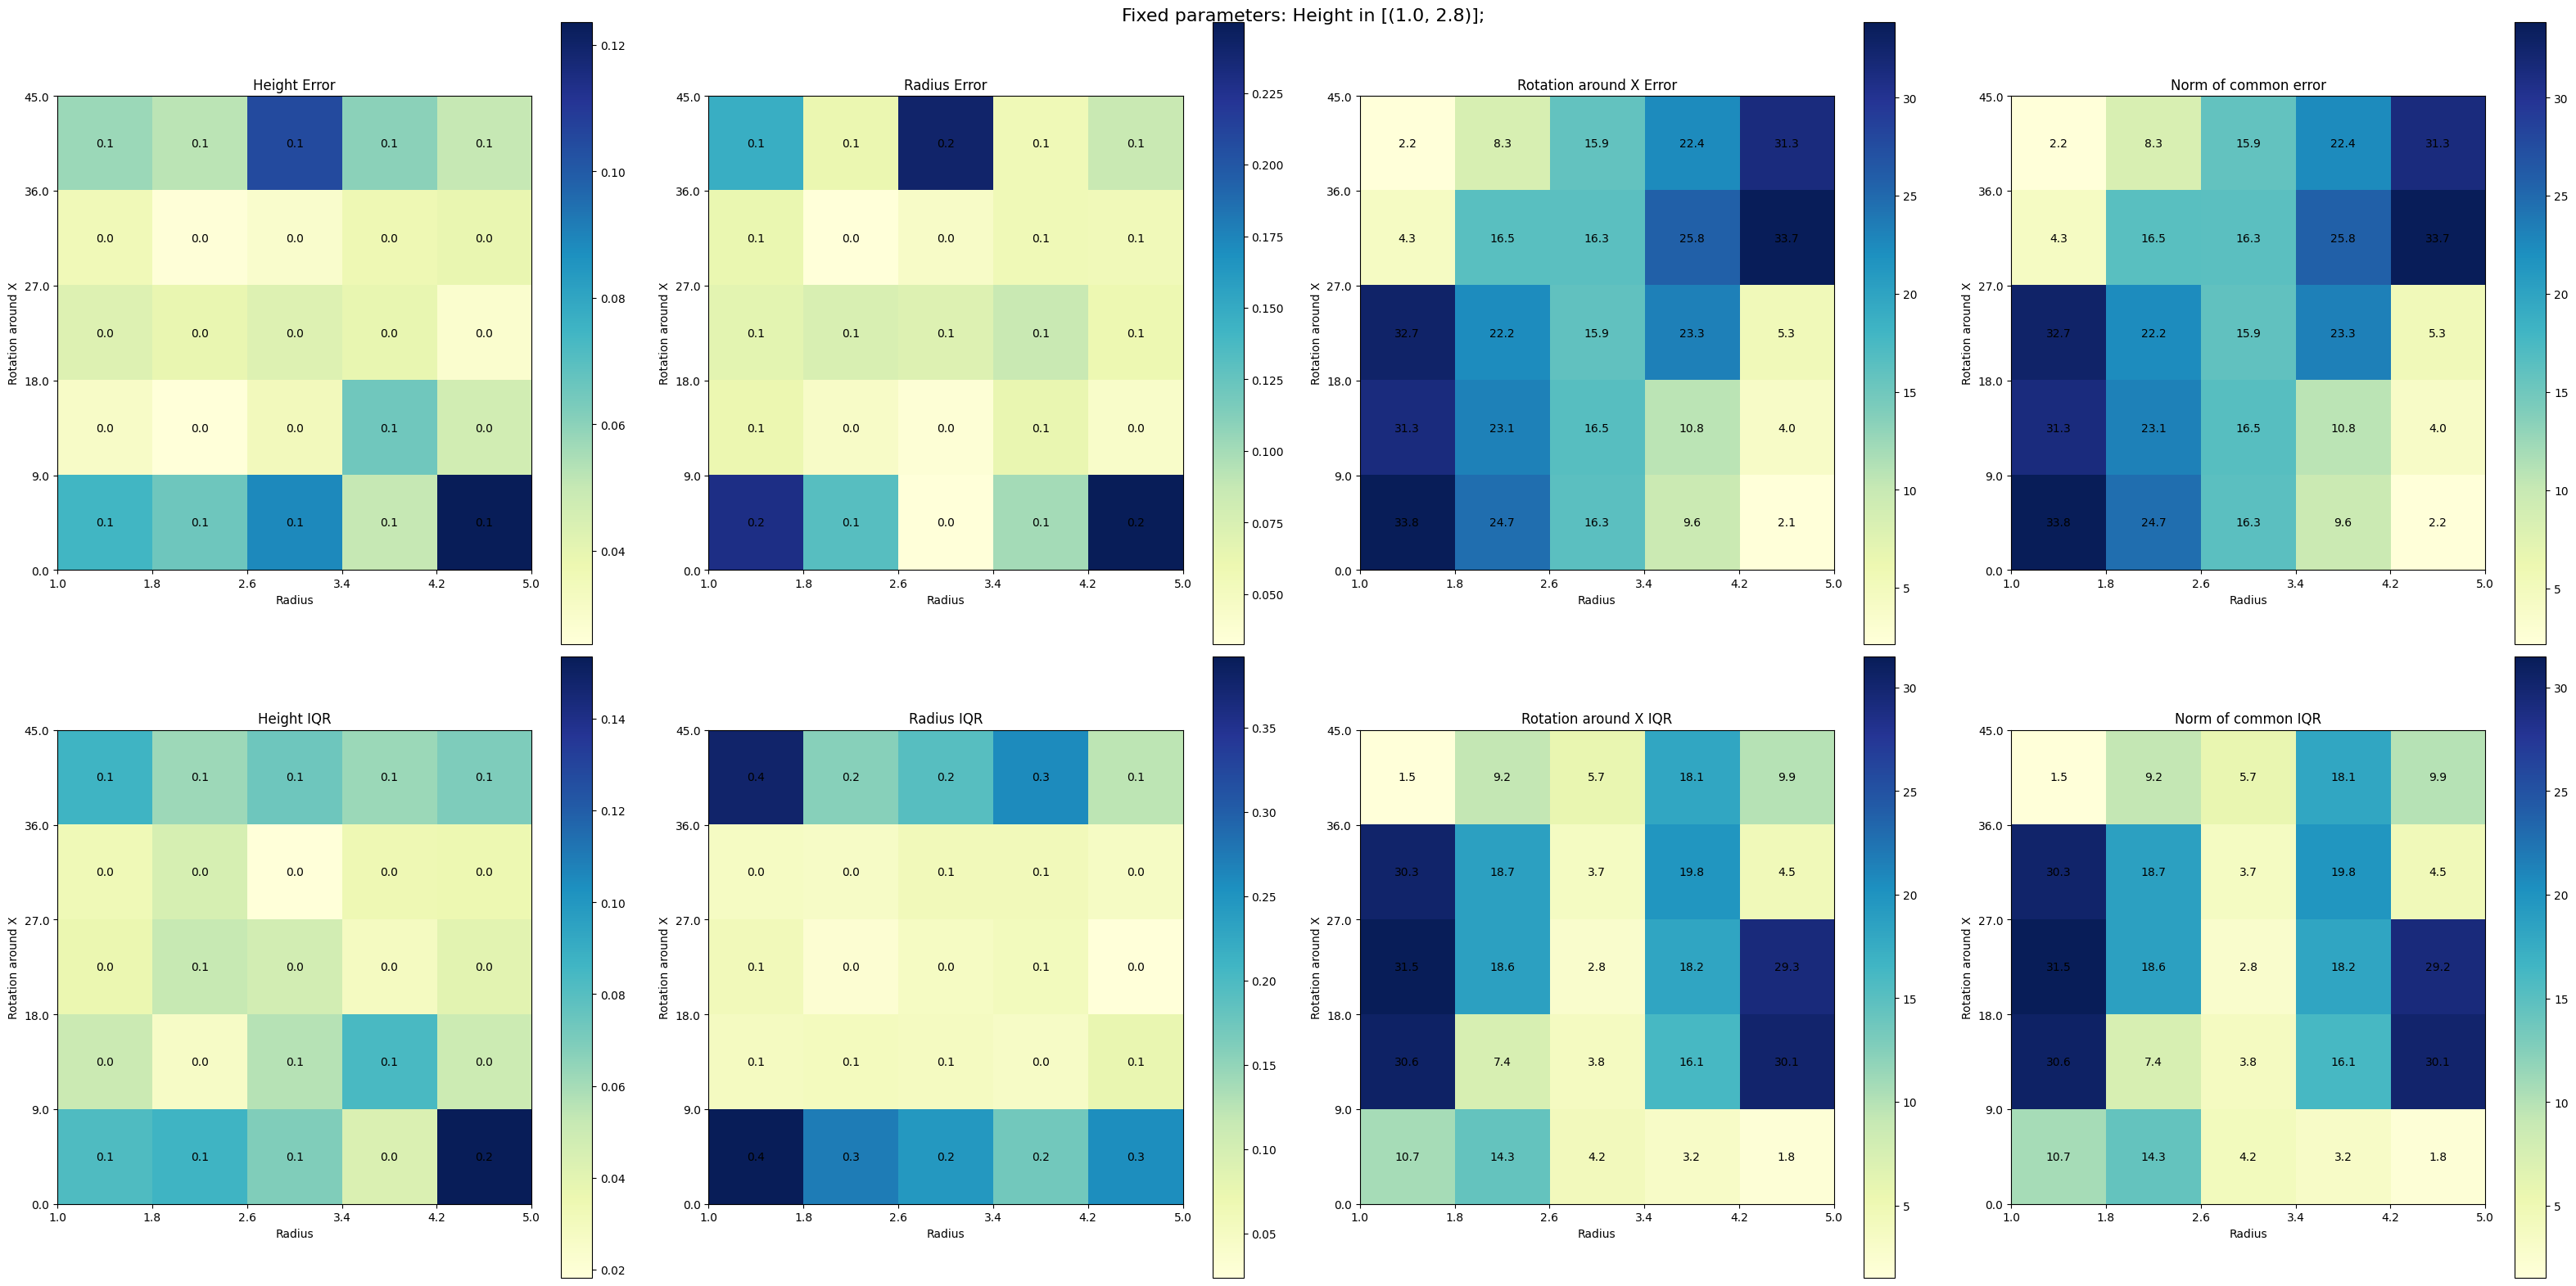

In [77]:
mcu.plot_2d_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs, p, param_names, fixed_params_map={0: 2}, intervals=intervals)